# Predicting the score of student based on hours of study using simple linear regression

# Import Libraries

In [6]:
#importing the libraries 
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Read the Data

In [7]:
#data from the given link
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [8]:
# printing the dataset 
print(dataset)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


# Check out the data

In [9]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [12]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Cheking For NULL Values

In [13]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Covarience Matrix and Heatmap

          Hours      Scores
Hours    6.3761   62.331500
Scores  62.3315  639.426667


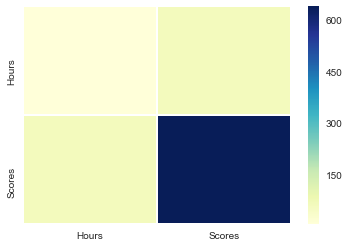

In [14]:
covMatrix = pd.DataFrame.cov(dataset)
print (covMatrix)
sns.heatmap(covMatrix,cmap='YlGnBu',linewidths=0.30) # As we see the Hours and Scores are Highly correlated

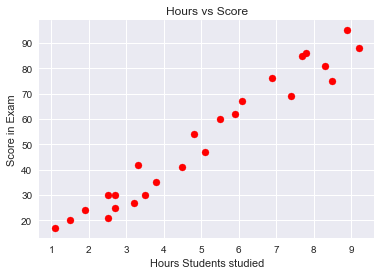

In [15]:
#plot Graph of Hours vs Score
plt.scatter(dataset['Hours'] ,dataset['Scores'] , color = 'red')
plt.xlabel('Hours Students studied')
plt.ylabel('Score in Exam')
plt.title("Hours vs Score")

In [16]:
# take X and y columns 
X = dataset.iloc[ : , :-1].values 
y = dataset.iloc[ : , 1].values
print(X)
print(y)

[[ 2.5]
 [ 5.1]
 [ 3.2]
 [ 8.5]
 [ 3.5]
 [ 1.5]
 [ 9.2]
 [ 5.5]
 [ 8.3]
 [ 2.7]
 [ 7.7]
 [ 5.9]
 [ 4.5]
 [ 3.3]
 [ 1.1]
 [ 8.9]
 [ 2.5]
 [ 1.9]
 [ 6.1]
 [ 7.4]
 [ 2.7]
 [ 4.8]
 [ 3.8]
 [ 6.9]
 [ 7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76 86]


Only One Indenpendent Variable here, No categorical Variable, No missing values so no needed to Preprocessing More Splitting the data into trianning and test set

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.25, random_state = 1 )
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 7.4]
 [ 3.5]
 [ 3.2]
 [ 2.7]
 [ 9.2]
 [ 5.5]
 [ 3.8]
 [ 5.1]
 [ 2.5]
 [ 2.5]
 [ 8.9]
 [ 7.8]
 [ 6.9]
 [ 2.7]
 [ 8.3]
 [ 4.5]
 [ 5.9]
 [ 1.5]]
[[ 1.1]
 [ 3.3]
 [ 1.9]
 [ 8.5]
 [ 4.8]
 [ 7.7]
 [ 6.1]]
[69 30 27 30 88 60 35 47 30 21 95 86 76 25 81 41 62 20]
[17 42 24 75 54 85 67]


In [18]:
# Train the trainning Set into Linear Regression Model 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_pred = regressor.predict(X_test)
print('Predicted data of test set\n' , y_pred)

Predicted data of test set
 [ 13.23705714  34.74382459  21.05769985  85.57800223  49.40752968
  77.75735951  62.11607409]


# Prdicted Hours vs Actual Score

In [20]:
df = pd.DataFrame({'Predicted' : y_pred , 'Actual' : y_test})
df

,Actual,Predicted
0,17,13.237057
1,42,34.743825
2,24,21.057700
3,75,85.578002
4,54,49.407530
5,85,77.757360
6,67,62.116074


# Checking the R2-Squared Score and Mean-Squared Error

In [21]:
#R-Squared score 
from sklearn.metrics import r2_score
print("R-Squred Score is ",r2_score(y_test, y_pred))

R-Squred Score is  0.928017583684


 the 92.80% of the variance for a dependent variable that's explained by an independent variable

In [22]:
#Mean-Squared Error
from sklearn.metrics import mean_squared_error
print('mean_squared_error is', mean_squared_error(y_test , y_pred))

mean_squared_error is 40.6803484212


# Predict the Student Score For 9.25 Hours

In [23]:
Data = 9.25 
print("Student will Score After 9.25 Hours of Study :", regressor.predict([[9.25]]))

Student will Score After 9.25 Hours of Study : [ 92.90985477]


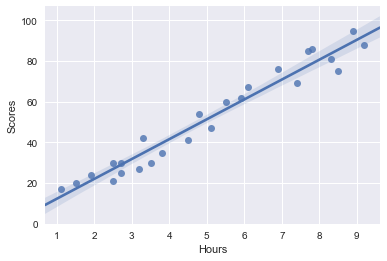

In [24]:
sns.regplot(data=dataset,x="Hours",y="Scores")
plt.show()

In [25]:
print('Equation line is y = m*',regressor.coef_,'+', regressor.intercept_)

Equation line is y = m* [ 9.77580339] + 2.48367340537
